In [1]:
import numpy as np

In [2]:
import sys, os, git
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/examples/pyplot-perso/")
from color_series1 import colors
from functions import complete_panel, save_figure, set_boundaries, add_subplotlabels, set_boundaries
path_figures = "/docs/source/figures/illustrations/bulk-water/"

In [3]:
from matplotlib import pyplot as plt

In [4]:
all_N = []
all_R1_intra = []
all_R2_intra = []
all_gij_intra = []
all_f = []
all_R1_inter = []
all_R2_inter = []
all_gij_inter = []
for N in ["N25", "N39", "N62", "N99", "N158", "N251", "N398", "N631", "N1002", "N1589", "N2521", "N4000"]:

    intra = "bulk-water/raw_data/" + N + "_intra_dt1.0.npy"
    dictionary = np.load(intra, allow_pickle=True)
    t = np.real(dictionary.item()["t"])
    f = np.real(dictionary.item()["f"])
    C_intra = np.real(dictionary.item()["C"])
    R1_intra = np.real(dictionary.item()["R1"])
    R2_intra = np.real(dictionary.item()["R2"])
    # N = np.real(dictionary.item()["N"])
    all_N.append(np.float32(N[1:]))
    all_R1_intra.append(R1_intra)
    all_R2_intra.append(R2_intra)
    all_gij_intra.append(C_intra)
    all_f.append(f)

    inter = "bulk-water/raw_data/" + N + "_inter_dt1.0.npy"
    dictionary = np.load(inter, allow_pickle=True)
    t = np.real(dictionary.item()["t"])
    f = np.real(dictionary.item()["f"])
    C_inter = np.real(dictionary.item()["C"])
    R1_inter = np.real(dictionary.item()["R1"])
    R2_inter = np.real(dictionary.item()["R2"])
    # N = np.real(dictionary.item()["N"])
    all_R1_inter.append(R1_inter)
    all_R2_inter.append(R2_inter)
    all_gij_inter.append(C_inter)

all_N = np.array(all_N)
n = 5
# 
all_R10_intra_vs_N = []
for R1 in all_R1_intra:
    all_R10_intra_vs_N.append(np.mean(R1[:n]))
all_R10_intra_vs_N = np.float32(all_R10_intra_vs_N)
print("actual frequency :", f[1] , "MHz")
all_R20_intra_vs_N = []
for R2 in all_R2_intra:
    all_R20_intra_vs_N.append(np.mean(R2[:n]))
all_R20_intra_vs_N = np.float32(all_R20_intra_vs_N)

# 
all_R10_inter_vs_N = []
for R1 in all_R1_inter:
    all_R10_inter_vs_N.append(np.mean(R1[:n]))
all_R10_inter_vs_N = np.float32(all_R10_inter_vs_N)
print("actual frequency :", f[1] , "MHz")
all_R20_inter_vs_N = []
for R2 in all_R2_inter:
    all_R20_inter_vs_N.append(np.mean(R2[:n]))
all_R20_inter_vs_N = np.float32(all_R20_inter_vs_N)

actual frequency : 499.50049950049953 MHz
actual frequency : 499.50049950049953 MHz


In [5]:
all_dt = []
all_R1_2_intra = []
all_R2_2_intra = []
all_gij_2_intra = []
all_R1_2_inter = []
all_R2_2_inter = []
all_gij_2_inter = []
all_f_2 = []
all_t_2 = []
for dt in ['1.0' , '2.0', '4.0', '8.0', '16.0', '32.0']:
    intra = "bulk-water/raw_data/N4000_intra_dt"+dt+".npy"
    dictionary = np.load(intra, allow_pickle=True)
    t = np.real(dictionary.item()["t"])
    f = np.real(dictionary.item()["f"])
    C = np.real(dictionary.item()["C"])
    R1 = np.real(dictionary.item()["R1"])
    R2 = np.real(dictionary.item()["R2"])
    # N = np.real(dictionary.item()["N"])
    all_dt.append(np.float32(dt))
    all_R1_2_intra.append(R1)
    all_R2_2_intra.append(R2)
    all_gij_2_intra.append(C)
    all_f_2.append(f)
    all_t_2.append(t)
    inter = "bulk-water/raw_data/N4000_inter_dt"+dt+".npy"
    dictionary = np.load(inter, allow_pickle=True)
    t = np.real(dictionary.item()["t"])
    f = np.real(dictionary.item()["f"])
    C = np.real(dictionary.item()["C"])
    R1 = np.real(dictionary.item()["R1"])
    R2 = np.real(dictionary.item()["R2"])
    # N = np.real(dictionary.item()["N"])
    all_R1_2_inter.append(R1)
    all_R2_2_inter.append(R2)
    all_gij_2_inter.append(C)
for dt in ['0.2' , '0.4', '0.8', '1.6', '3.2', '6.4']:
    intra = "bulk-water/raw_data/N4000_HR_intra_dt"+dt+".npy"
    dictionary = np.load(intra, allow_pickle=True)
    t = np.real(dictionary.item()["t"])
    f = np.real(dictionary.item()["f"])
    C = np.real(dictionary.item()["C"])
    R1 = np.real(dictionary.item()["R1"])
    R2 = np.real(dictionary.item()["R2"])
    # N = np.real(dictionary.item()["N"])
    all_dt.append(np.float32(dt))
    all_R1_2_intra.append(R1)
    all_R2_2_intra.append(R2)
    all_gij_2_intra.append(C)
    all_f_2.append(f)
    all_t_2.append(t)
    inter = "bulk-water/raw_data/N4000_HR_inter_dt"+dt+".npy"
    dictionary = np.load(inter, allow_pickle=True)
    t = np.real(dictionary.item()["t"])
    f = np.real(dictionary.item()["f"])
    C = np.real(dictionary.item()["C"])
    R1 = np.real(dictionary.item()["R1"])
    R2 = np.real(dictionary.item()["R2"])
    # N = np.real(dictionary.item()["N"])
    all_R1_2_inter.append(R1)
    all_R2_2_inter.append(R2)
    all_gij_2_inter.append(C)
all_dt = np.array(all_dt)
# 
all_R10_inter_vs_step = []
for R1 in all_R1_2_inter:
    all_R10_inter_vs_step.append(R1[1])
print("actual frequency :", f[1] , "MHz")
all_R20_inter_vs_step = []
for R2 in all_R2_2_inter:
    all_R20_inter_vs_step.append(R2[1])
all_R10_inter_vs_step = np.float32(all_R10_inter_vs_step)
all_R20_inter_vs_step = np.float32(all_R20_inter_vs_step)
# 
all_R10_intra_vs_step = []
for R1 in all_R1_2_intra:
    all_R10_intra_vs_step.append(R1[1])
print("actual frequency :", f[1] , "MHz")
all_R20_intra_vs_step = []
for R2 in all_R2_2_intra:
    all_R20_intra_vs_step.append(R2[1])
all_R10_intra_vs_step = np.float32(all_R10_intra_vs_step)
all_R20_intra_vs_step = np.float32(all_R20_intra_vs_step)

actual frequency : 499.2012779552716 MHz
actual frequency : 499.2012779552716 MHz


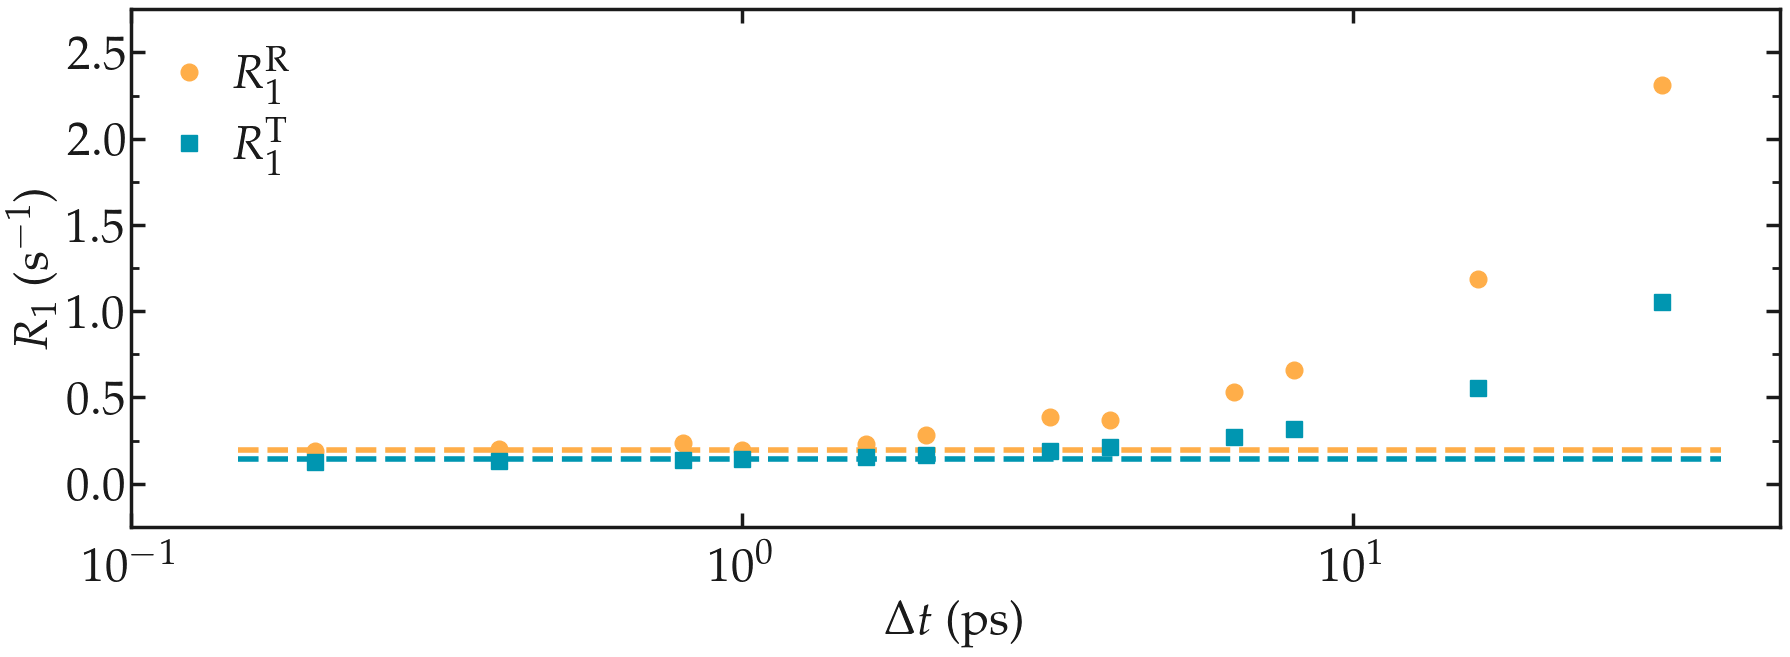

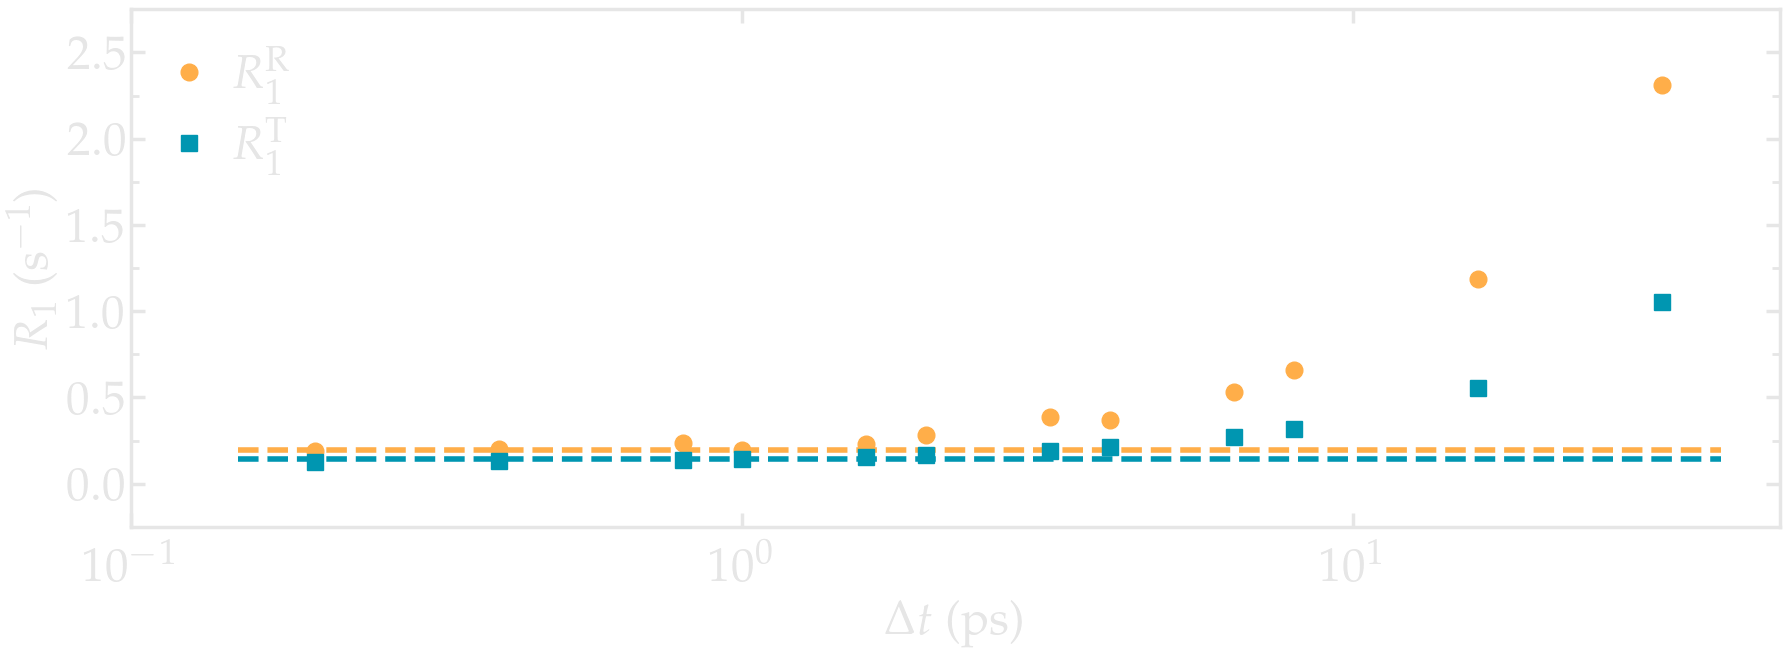

In [63]:
filename = "effect_dt"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,12))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    x = np.linspace(0.15, 40)
    ax[-1].semilogx(all_dt, all_R10_intra_vs_step, "o", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$R_1^\mathrm{R}$')
    ax[-1].semilogx(x, x*0 + all_R10_intra_vs_step[0],
                    "--", color=colors["myorange"],
                    markersize = 12, linewidth=4)
    ax[-1].semilogx(all_dt, all_R10_inter_vs_step, "s", color=colors["myblue"],
                    markersize = 12, linewidth=4, label=r'$R_1^\mathrm{T}$')
    ax[-1].semilogx(x, x*0 + all_R10_inter_vs_step[0],
                    "--", color=colors["myblue"],
                    markersize = 12, linewidth=4)
    complete_panel(ax[-1], r'$\Delta t$ (ps)', r'$R_1$ (s$^{-1}$)',
                   legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(0.1, 50), y_boundaries=(-0.25, 2.75))
    # x_ticks=np.arange(-1, 0.2, 0.2)
    # add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)